<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones básicas en pandas
* Preprocesamiento y exploración inicial de datos
* Regresión Lineal Multivariada
* PCA, LDA
* Selección de atributos _from scratch_, Métodos Wrapper e Información Mutual
* Selección de modelos por _Cross Validation_


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o un por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "avalderr") al correo electrónico del ayudante (*<alvaro.valderrama.13@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2019 Tarea1]
* Fecha de entrega y presentaciones: 26 de Abril. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Aprendizaje con regresión lineal  
[2.](#segundo) Análisis de audios como datos brutos  
[3.](#tercero) Análisis de emociones en tweets

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes seran valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_.

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

La regresión lineal, modelo que busca la mejor forma de combinar linealmente variables para predecir otra variable numérica es una de las herramientas más básicas a nuestra disposición. Sin embargo se puede encontrar muchas aplicaciones a esta aproximación con buenos resultados, y suele ser un buen punto de partida para problemas totalmente desconocidos por su velocidad de implementar y simpleza de interpretar. Además, al igual que muchas de las técnicas de _Machine Learning_, no tiene un ambito de uso definido, es decir podemos aplicar un metodo similar para problemas radicalmente distintos. 

<img src="https://i.stack.imgur.com/cNJQs.png" style="height:50%;" />

En esta primera parte de la tarea, trabajaremos con un _dataset_ de _Kaggle_ llamado "_Black Friday_", el cual contiene alrededor de medio millón de registros. Este _dataset_ contiene diversas informaciones sobres los consumidores (edad, ocupación, género, entre otros) y el valor de la compra que realizaron al momento de la medición. Pueden descargar el _dataset_ desde https://www.kaggle.com/mehdidag/black-friday. Este _dataset_ fue pensado para intentar de predecir el valor de compra de un cliente en funcion de sus caracteristicas, sin embargo uno puede realizar distintas regresiones y tratar, por ejemplo, de predecir el rango de edad de un cliente basado en sus otras caracteristicas incluyendo el valor de su compra. En esta primera parte utilizaremos el set de datos para hacer regresión lineal sobre el valor de compra, es decir la variable a predecir es el valor de compra. 


 #### 1.a Modulos y carga de datos
 Comenzaremos cargando las librerias relevantes para el resto de la tarea y cargando los datos a un _DataFrame_ para facilitar su manipulación. Explore los tipos de datos que hemos cargado, los valores que tienen estos datos y como se distribuyen. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression

data = pd.read_csv("BlackFriday.csv")

In [2]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Cuente los valores N/A de cada columna con el siguiente código y explique brevemente porque en un primer momento preferiremos eliminar la segunda y tercera categoría del producto.

 Cuantos registros hay de mujeres y de hombres? Cuanto gastan en promedio los distintos rangos de edad? Entregue alguna otra medicion que le parezca interesante y permita familiarizarse con los datos.

In [ ]:
print(pd.read_csv("BlackFriday.csv").isna().sum()) #para sumar los valores Nan

print(data.describe())

print(data.groupby("Gender").nunique())
#unique() entrega la cantidad de elementos distintos para cada categoria 
data.head()

In [ ]:
print(data.groupby("Gender").Age.nunique()) #cuantos de los datos diferentes hay para F en la edad y en M para la edad

 Cuantos registros hay de mujeres y de hombres?  Entregue alguna otra medicion que le parezca interesante y permita familiarizarse con los datos.

In [ ]:
data.groupby('Gender').size()

Los hombres realizan mas compras que las mujeres, 3.06 veces mas 

Cuanto gastan en promedio los distintos rangos de edad?

In [8]:
data.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

In [ ]:
np.unique(data['Age'])

In [ ]:
rangosedad=np.unique(data['Age'])
for i in rangosedad:
     print(data[(data.Age ==str(i))]['Purchase'].mean())    
   

Los rangos de edad tiene un gasto promedio similar 

promedio valor de Compra según genero

In [ ]:
print(data[(data.Gender=='F')]['Purchase'].describe())
print(data[(data.Gender=='M')]['Purchase'].describe())

 #### 1.b Columnas descartadas
De los tipos de datos que tenemos cuales resultarán problematicos para realizar regresión lineal? Del dato "City_Category", cuantos valores distintos existen? (puede usar el metodo .unique por ejemplo)
Porqué a pesar de ser dato numerico las columnas "Product_Category" podrían comportarse mal con la regresión lineal?

Los datos que no son numericos y aquellos que son numericos pero no tiene un significado como tal, sino mas bien son establecidos para diferenciar productos o identificar al comprador.

In [ ]:
data.groupby('City_Category').size()

In [ ]:
data.groupby('Stay_In_Current_City_Years').size()

Existen 3 valores distintos de valores en el dato "City_Category".

La variable "Product_Category_1-2-3" puede generar problemas por la gran cantidad de elementos faltantes y no caracterizan al producto sino mas bien son establecidos arbitrariamente. 

In [4]:
data.dtypes
data = data.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']) 

In [5]:
data.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,F,0-17,10,A,2,0,8370
1,F,0-17,10,A,2,0,15200
2,F,0-17,10,A,2,0,1422
3,F,0-17,10,A,2,0,1057
4,M,55+,16,C,4+,0,7969


 #### 1.c  Datos Categoricos
 Transformaremos ahora los datos no numericos a datos numéricos. Para esto transformaremos el género a una variable binaria como muestra el código siguiente. Transforme todos los datos problematicos de manera similar. Discuta la eleccion realizada para "City_Category", más adelante haremos otra propuesta. Para los rangos de edad puede utilizar el promedio de ambos valores. Discuta si tiene alguna relevancia la elección del valor numerigo (_e.g._ 1 ó 0 para mujer) para el modelo de regresión lineal. Es así en todos los casos o solo para variables binarias?
 Por qué el dato "Occupation" no podemos utilizarlo directamente a pesar de ser numérico? Que solucion nos da el metodo `get_dummies` de pandas?

In [ ]:
"""
data['Gender'] = data.Gender.apply(lambda x: {'F':1,'M':0}[x])
city_cat_dic = {'A':-1, 'C':0, 'B':1}
age_dic = # . . .
Stay_In_Current_City_Years_dic = # . . .

data_pre = pd.get_dummies(data.Occupation)
col = list(data.columns)
col.remove('Occupation')
data_pre[col] = data[col]
"""


La variable Occupation no puede ser utilizada porque a pesar de ser un valor numerico no entrega información sobre la ocupación real, no aporta información al modelo.

In [ ]:
data.groupby('Occupation').size()

In [ ]:
data.groupby('Marital_Status').size()

In [6]:
gender=pd.get_dummies(data.Gender)
#age=pd.get_dummies(data.Age)
citycat=pd.get_dummies(data.City_Category)
#stayears=pd.get_dummies(data.Stay_In_Current_City_Years)
marital=pd.get_dummies(data.Marital_Status)

datadummies=pd.concat([data,gender,citycat],axis='columns')
dataf=datadummies.drop(['Gender','City_Category','Occupation','Marital_Status'],axis='columns')

In [7]:
dataf.head()

,Age,Stay_In_Current_City_Years,Purchase,F,M,A,B,C
0,0-17,2,8370,1,0,1,0,0
1,0-17,2,15200,1,0,1,0,0
2,0-17,2,1422,1,0,1,0,0
3,0-17,2,1057,1,0,1,0,0
4,55+,4+,7969,0,1,0,0,1


In [9]:
dataf['Stay_In_Current_City_Years']= dataf.Stay_In_Current_City_Years.apply(lambda x: {'0':0,'1':1,'2':2,'3':3,'4+':4}[x])
dataf['Age']= dataf.Age.apply(lambda x: {'0-17':8.5,'18-25':21.5,'26-35':30.5,'36-45':40.5,'46-50':48,'51-55':53,'55+':55}[x])

In [10]:
dataf.head()

,Age,Stay_In_Current_City_Years,Purchase,F,M,A,B,C
0,8.5,2,8370,1,0,1,0,0
1,8.5,2,15200,1,0,1,0,0
2,8.5,2,1422,1,0,1,0,0
3,8.5,2,1057,1,0,1,0,0
4,55.0,4,7969,0,1,0,0,1


 #### 1.d  Separación de datos
 Separaremos los datos en _train_, _validation_ y _test_ con 75%, 15% y 10% de los datos respectivamente. Verifique que se cumplen aproximadamente las proporciones. Luego separe el _target_ del resto de las variables que consideraremos. 

In [11]:
data_train,data_val=train_test_split(dataf, test_size = 0.25)
data_val,data_test=train_test_split(data_val, test_size = 0.4)
#data_x_train = data_pre_train.drop(columns='Purchase')
#data_y_train=data_train['Purchase']
x_train=data_train.drop('Purchase',axis=1)
y_train=data_train['Purchase']

x_val=data_val.drop('Purchase',axis=1)
y_val=data_val['Purchase']


x_test=data_test.drop('Purchase',axis=1)
y_test=data_test['Purchase']

In [12]:
print(len(data_train)/len(dataf))
print(len(data_val)/len(dataf))
print(len(data_test)/len(dataf))

0.749998604851026
0.15000083708938441
0.1000005580595896


In [13]:
y_test.head()

262616     5225
135740     7853
327969     5359
300231    18987
380943    11485
Name: Purchase, dtype: int64

In [14]:
x_test.head()

,Age,Stay_In_Current_City_Years,F,M,A,B,C
262616,30.5,1,0,1,1,0,0
135740,40.5,1,0,1,0,0,1
327969,30.5,4,1,0,1,0,0
300231,21.5,2,0,1,0,1,0
380943,40.5,0,0,1,0,0,1


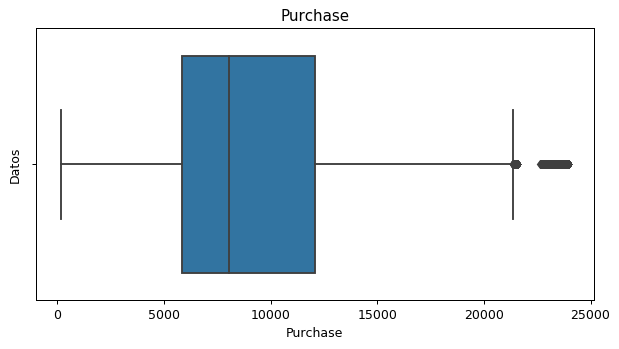

In [15]:
import seaborn as sns
plt.figure(figsize=(8,4), dpi=90)
sns.boxplot(list(dataf['Purchase']))
plt.ylabel('Datos')
plt.xlabel('Purchase')
plt.title('Purchase')
plt.show()

Es posible apreciar en el boxplot que los valores de compra 'Purchase' estan sesgados hacia los valores mas bajos, quedando como outlaier auqellas compras por sobre los 21000 aproximadamente.

 #### 1.e  Estandarización
 Utilizaremos `Standar_Scaler` para estandarizar los datos antes de entrenar. Que ventaja tiene en su opinion el tener un objeto que permite estandarizar (y hacer la transformación inversa) frente a hacer la opreación aritmetica "manualmente"? Note el cambio de tipo entre `data_x_train` y `x_train`. Tiene utilidad estandarizar el _target_ para este modelo? Guarde el _target_ estandarizado de todas formas para comparar más adelante.

En los datos importa la unidad y la magnitud de estos, principalemente porque la variable a predecir generalmente es diferente a las variables que la condicionan, para lo cual se utiliza la estandarizacion o la normalizacion. Se hace necesaria para modelos como k-means, kNN, clustering, regresion lineal, regresion logaritmica, para todo redes neuronales. 
Para los arboles de decicion o random forest no se requiere escalar. 

In [16]:
#scaler_x = StandardScaler()
#scaler_x.fit(data_x_train)
#x_tr = scaler_x.transform(data_x_train)

scaler=StandardScaler()
scaler.fit(x_train)
scaler.fit(y_train.values.reshape(-1,1))

scaler.fit(x_val)
scaler.fit(y_val.values.reshape(-1,1))

scaler.fit(x_test)
scaler.fit(y_test.values.reshape(-1,1))

X_train=scaler.transform(x_train)
Y_train=scaler.transform(y_train.values.reshape(-1,1))

X_val=scaler.transform(x_val)
Y_val=scaler.transform(y_val.values.reshape(-1,1))

X_test=scaler.transform(x_test)
Y_test=scaler.transform(y_test.values.reshape(-1,1))



#x_val = scaler_y(# . . .)
# . . .
# . . . 
#scaler_y.fit(data_y_train.values.reshape(-1,1))
# . . . 

 #### 1.f Primera Regresión
 Realice una regresión lineal con los datos escalados y no escalados. Compare sus _scores_. Cual es la formula del _score_ que utiliza el regresor (puede buscar en la documentación)? Qué interpretación se le puede dar al _score_? Puede concluir que los datos escalados o no escalados entregan un mejor modelo? Sobre que conjunto de datos (_train_, _test_ o _valitdation_) deberíamos comparar el _score_?

In [17]:
from sklearn import metrics

In [18]:

reg_scaled = LinearRegression()
reg_scaled.fit(x_train,y_train)
y_pred=reg_scaled.predict(x_val)
#reg_scaled.fit(x_tr,y_tr)
#reg_scaled.score(# . . .)
#y_pred=reg_escale.predict(X_test) 
#metrics.accuracy_score(Y_test,y_pred )

In [19]:
reg_scaled.score(x_val,y_val)

0.008821397458041558

In [20]:
((metrics.mean_squared_error(y_pred,y_val))/500000)**0.5

7.038592744032642

In [21]:
reg_scaled = LinearRegression()
reg_scaled.fit(X_train,Y_train)
Y_pred=reg_scaled.predict(X_val)

In [22]:
reg_scaled.score(X_val,Y_val)

-0.03863912429867922

In [23]:
metrics.mean_squared_error(Y_pred,Y_val)

1.0533904943694827

In [24]:
Y_pred_invers=pd.DataFrame(scaler.inverse_transform(Y_pred))

In [25]:
Y_pred_invers.head()

,0
0,9308.831114
1,10549.833255
2,10549.833255
3,10549.833255
4,9308.831114


 #### 1.g  Tranformaciones simples
 Grafique como se distribuyen los precios, apoyese en el siguiente código. Recuerde que los gráficos deben ir acompañados de título, nombre de ejes entre otros.
 Viendo el gráfico, pareciera que una representación lineal funcionará bien para modelar este tipo de datos?
 
Prueba algunas transformaciones simples, como logaritmo o raiz cuadrada y comente los gráficos. 

Estos gráficos permiten concluir algo sobre el comportamiento de un modelo lineal o solo sirven de caracter exploratorio?

In [ ]:
"""
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),np.arange(0,data_y_train.shape[0],1),np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]))
"""

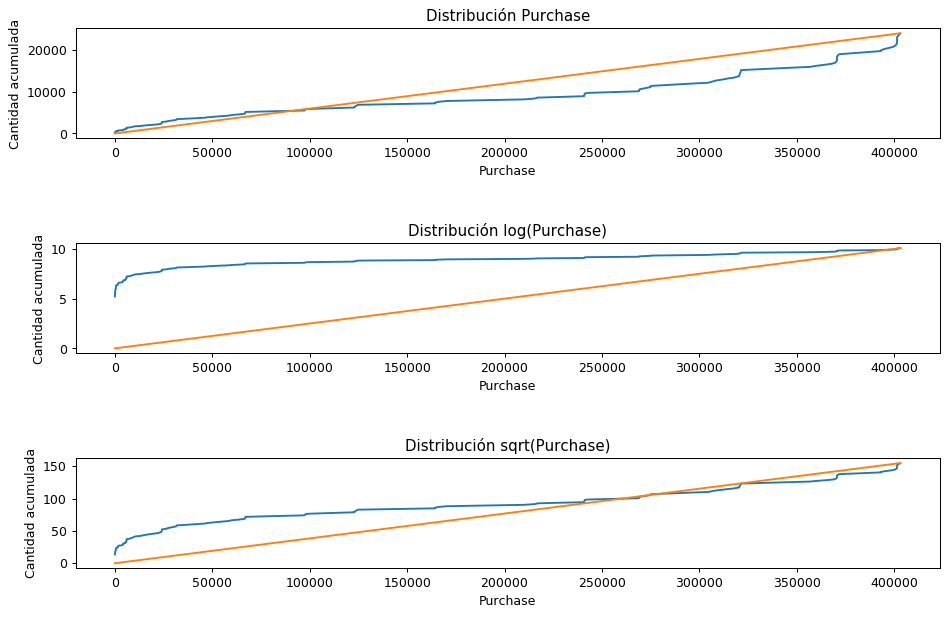

In [26]:
data_y_train = y_train
plt.figure(figsize=(6,6), dpi=90)
plt.subplot(3,1,1)
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),np.arange(0,data_y_train.shape[0],1),
         np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]))
plt.ylabel('Cantidad acumulada')
plt.xlabel('Purchase')
plt.title('Distribución Purchase')

data_y_train = np.log(y_train)
plt.subplot(3,1,2)
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),np.arange(0,data_y_train.shape[0],1),
         np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]))
plt.ylabel('Cantidad acumulada')
plt.xlabel('Purchase')
plt.title('Distribución log(Purchase)')

data_y_train = np.sqrt(y_train)
plt.subplot(3,1,3)
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),np.arange(0,data_y_train.shape[0],1),
         np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]))
plt.ylabel('Cantidad acumulada')
plt.xlabel('Purchase')
plt.title('Distribución sqrt(Purchase)')

plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.95,
                    wspace=0.2)

plt.show()

Si el comportamiento fuera mejor del objetivo (purchase) con la transformacion logaritmica entonces, deberia previo a aplicar el modelo realizar la operacion logaritmo al objetivo y aplicar el modelo, luego al resultado de la prediccion del modelo realizar la inversa del logaritmo para tener el resultado real. 

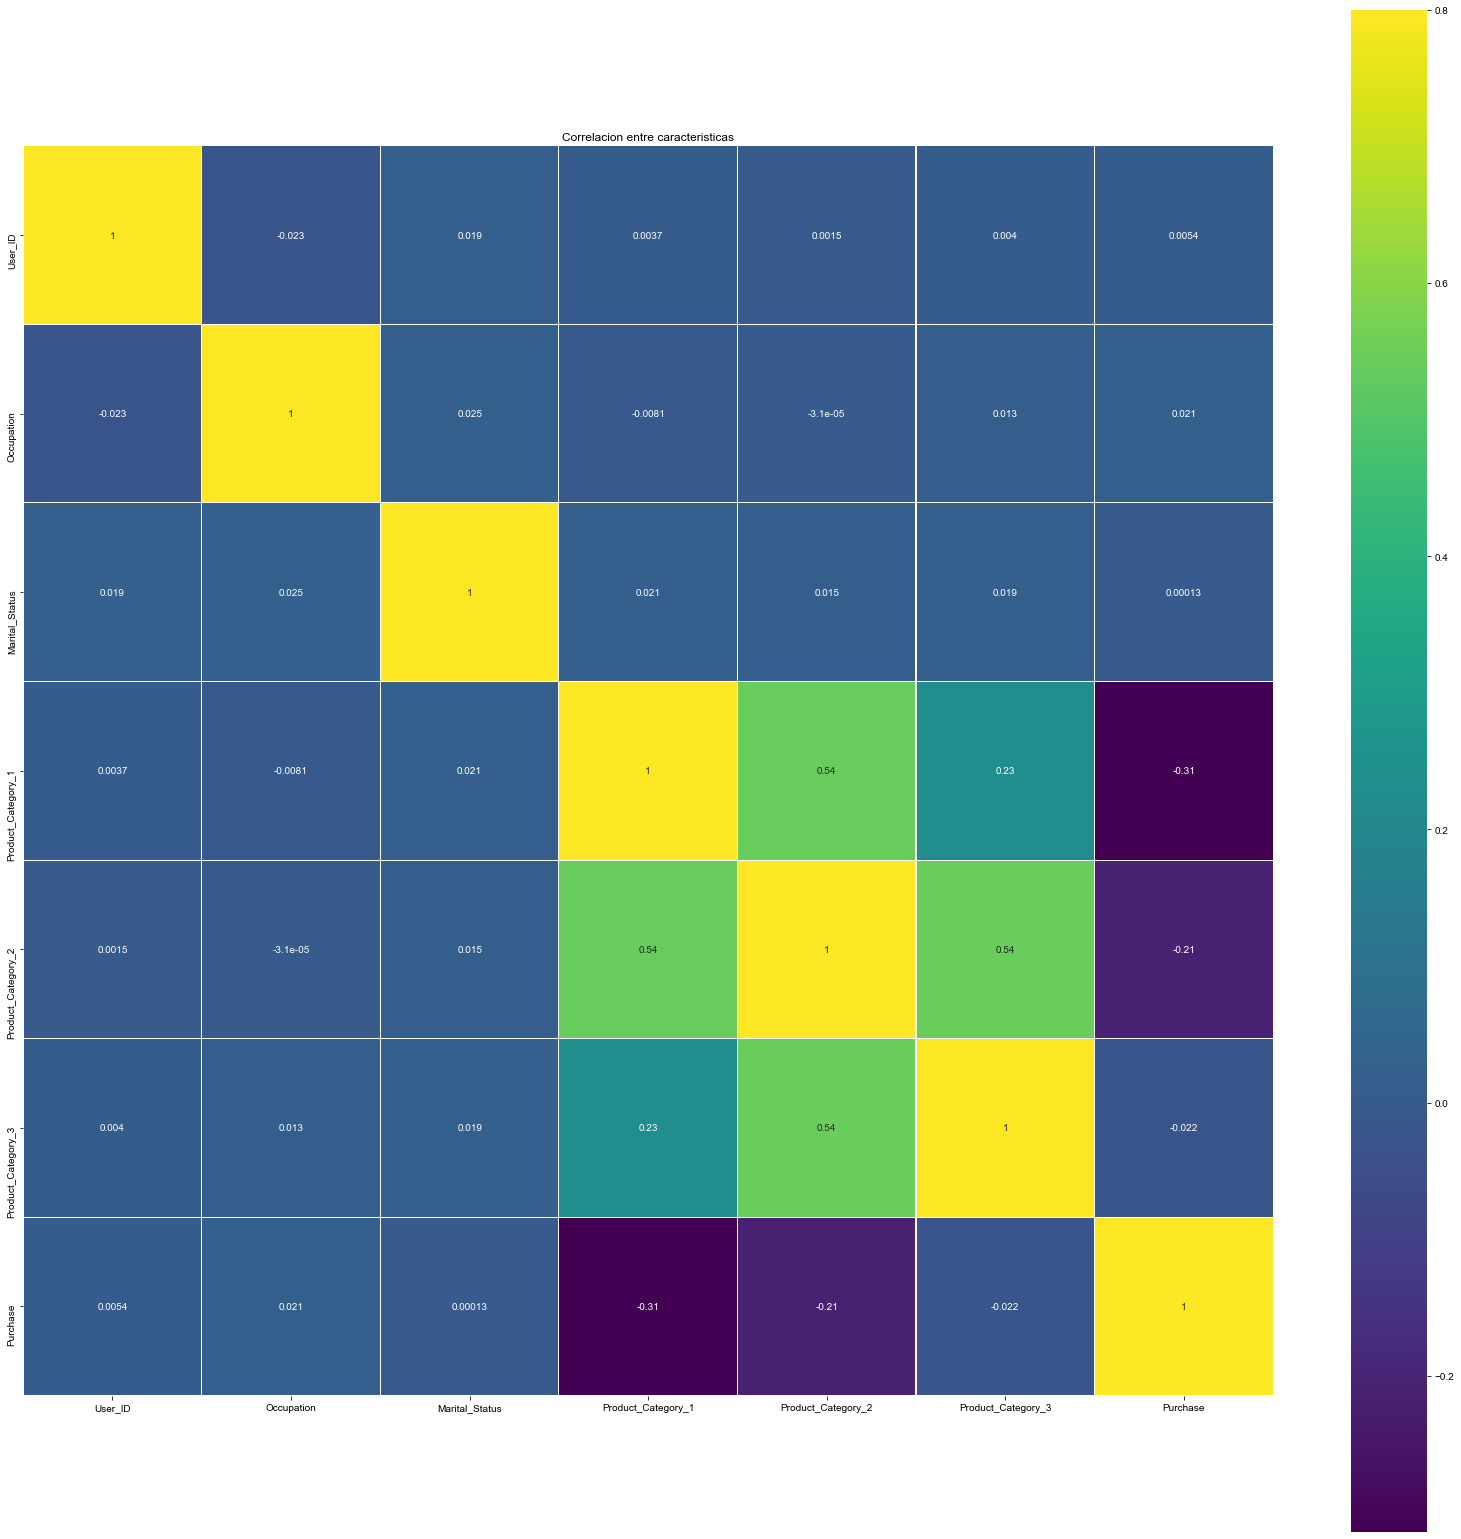

In [27]:
data1= pd.read_csv("BlackFriday.csv")
plt.figure(figsize=(28,28))
sns.heatmap(data1.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlacion entre caracteristicas');
plt.show()

#### 1.h 10-_fold_ sobre la potencia
Probaremos la utilidad real de realizar una transformación del target del tipo $P \gets P^{i}$ con $i \in [0,2]$ haciendo 10-_fold_ variando el valor de $i$ en a lo menos 10 incrementos. Puede basarse en la estrucuta siguiente. Debe elegir un estimador del error de validación de cada modelo (_e.g._ mediana, promedio...) y comentar brevemente por qué eligio tal estimador. 
Luego grafique como varia el error de validación en función de _i_. 
Finalmente, con el mejor valor de $i$ encontrado, entrene un regresor lineal con todos los datos de entrenamiento y compare su densempeño con los modelos anteriores.
Puede afirmar que alguna de las transformaciones mejore el desempeño del modelo? 

In [ ]:
"""
folds = KFold(10)

for i in range(1,21):

    for train_index, val_index in folds.split(x_tr):
        y_i = data_y_train.values**(i/10)
        y_tr_i = y_i[train_index]
        # . . .
        
        # entrene el modelo y guarde su score
     #  . . .
"""

La transformación se realiza solo a la variable objetivo

Nueva Separacion de la data para realizar Kfolg, dejamos solo una testeo fuera, y ademas separamos las variables X del objetivo 

In [43]:
data_train_Kf,data_test_Kf=train_test_split(dataf, test_size = 0.1)

x_train_Kf=data_train_Kf.drop('Purchase',axis=1)
y_train_Kf=data_train_Kf['Purchase']

x_test_Kf=data_test_Kf.drop('Purchase',axis=1)
y_test_Kf=data_test_Kf['Purchase']

In [44]:
folds = KFold(n_splits = 10,shuffle=True)
#shuffle=True toma datos desordenadamente pero sin repeticion
#n_splits es la cantidad de diviciones, 1 de ellas es la de testeo siempre
#KFold permite utilizar toda la data para entrenar y testear 

promedioscores=[]
for i in range(1,21):
    scors=[]
    for train_index,val_index in folds.split(x_train_Kf):    
        x_tr , x_val = x_train_Kf.iloc[train_index],x_train_Kf.iloc[val_index]
        y_tr , y_val = y_train_Kf.iloc[train_index],y_train_Kf.iloc[val_index]
        y_tr_t=(y_tr.values.reshape(-1,1))**(i/10)
        y_val_t=(y_val.values.reshape(-1,1))**(i/10)
        reg_scaled = LinearRegression()
        reg_scaled.fit(x_tr,y_tr_t)
        score=reg_scaled.score(x_tr,y_tr_t)
        scors.append(score)
    meanscores=np.mean(scors) #porque calcula 10 por cada for por el kfolds
    promedioscores.append(meanscores)    
    

In [45]:
promedioscores

[0.006885946236103668,
 0.007259849702642018,
 0.007587131345778675,
 0.007869010195299809,
 0.008109517083352924,
 0.008307689795578865,
 0.008470705462048334,
 0.008598664266389621,
 0.008698147497753096,
 0.008769651034051296,
 0.0088138845701769,
 0.008838282142738619,
 0.00884158418769323,
 0.008830069749711978,
 0.008801225408839587,
 0.00876011626602492,
 0.008707790994784238,
 0.008644726190685348,
 0.008572631905709805,
 0.008493582929371723]

kfold hecho para la data estandarizada tira error al aplicar la transformacion de la potencia, porque quedan muchos decimales 

In [30]:
scaler=StandardScaler()
scaler.fit(x_train_Kf)
scaler.fit(y_train_Kf.values.reshape(-1,1))

scaler.fit(x_test_Kf)
scaler.fit(y_test_Kf.values.reshape(-1,1))

X_train_Kf_s=scaler.transform(x_train_Kf)
Y_train_Kf_s=scaler.transform(y_train_Kf.values.reshape(-1,1))


X_test_Kf_s=scaler.transform(x_test_Kf)
Y_test_Kf_s=scaler.transform(y_test_Kf.values.reshape(-1,1))

In [37]:
folds = KFold(n_splits = 10,shuffle=True)
#shuffle=True toma datos desordenadamente pero sin repeticion
#n_splits es la cantidad de diviciones, 1 de ellas es la de testeo siempre
#KFold permite utilizar toda la data para entrenar y testear 

promedioscoresE=[]
for i in range(1,21):
    scors=[]
    for train_index,val_index in folds.split(X_train_Kf_s):    
        x_tr , x_val = X_train_Kf_s[train_index],X_train_Kf_s[val_index]
        y_tr , y_val = Y_train_Kf_s[train_index],Y_train_Kf_s[val_index]
        y_tr_t=(y_tr)#**(i/10)
        y_val_t=(y_val)#**#(i/10)
        reg_scaled = LinearRegression()
        reg_scaled.fit(x_tr,y_tr_t)
        score=reg_scaled.score(x_tr,y_tr_t)
        scors.append(score)
    meanscores=np.mean(scors) #porque calcula 10 por cada for por el kfolds
    promedioscoresE.append(meanscores)    
    

In [38]:
promedioscoresE

[-0.044346366724970915,
 -0.059864308190544446,
 -0.28050929833352867,
 -0.06486913675910835,
 -0.0626832506052172,
 -0.04108137183351451,
 -0.2078389922856399,
 -0.05205472215087359,
 -0.008913753646365586,
 -0.1301915360382611,
 -0.021210261458439805,
 -0.05634130271379077,
 -0.028128108081134383,
 -0.03769807534745513,
 -0.08016601779520251,
 -0.06110579599250482,
 -0.017431707355407798,
 -0.10963814596984504,
 -0.11422190335875895,
 -0.16434517561172807]

Text(0.5, 1.0, 'Desempeño regresion lineal al realizar transformación P^i, con medida de desempeño MSE')

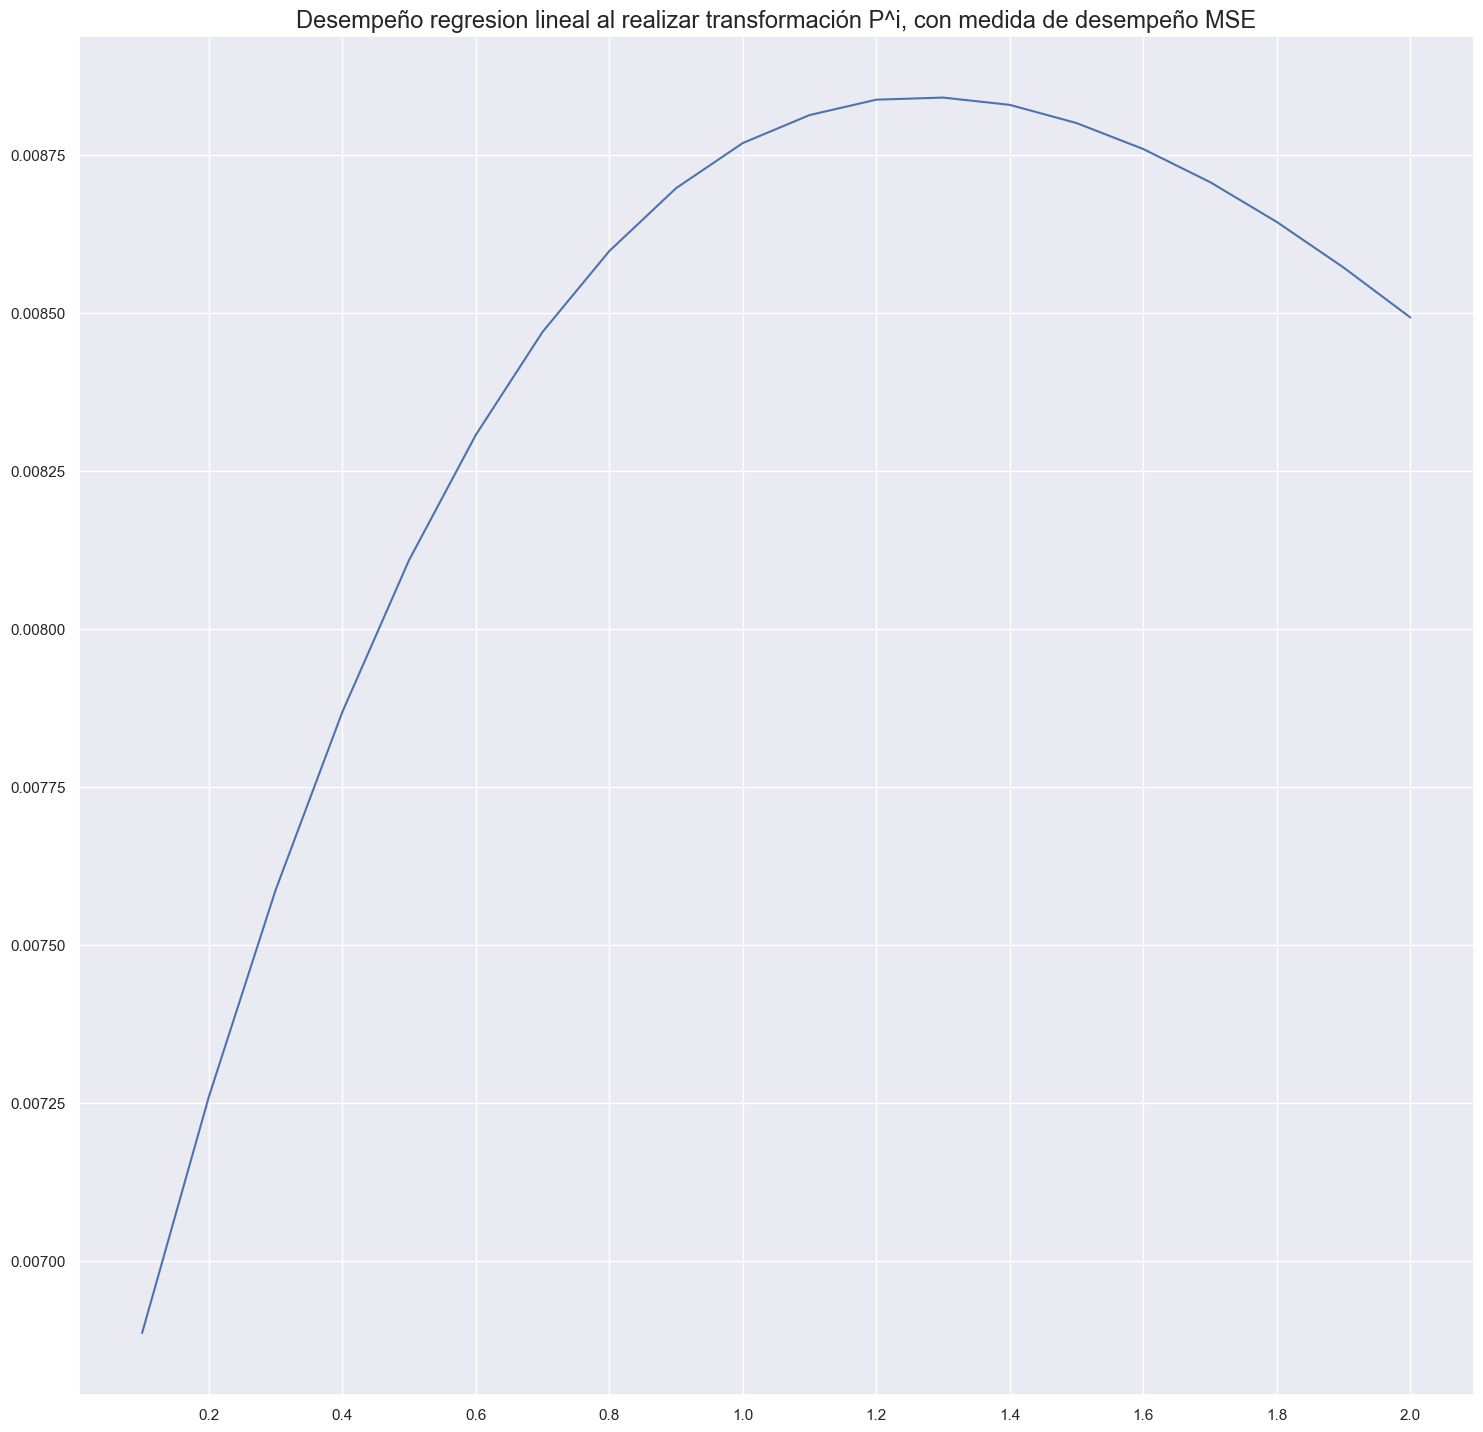

In [46]:
Pi=[]
for i in range(1,21):
    Pi.append(i/10)
x = Pi
y = promedioscores

plt.figure(figsize=(18,18), dpi=100)
#plt.subplot(2,1,1)
plt.xticks(np.linspace(0,2,11, endpoint=True))#define valores en el eje x, lo mismo para y con yxticks
plt.plot(x,y,label = 'real train')
#plt.plot(trainPredict, label = 'simulado train')
#plt.rc('xtick', labelsize=17) #tamaño de los valores de cada eje
#plt.rc('ytick', labelsize=17)
plt.title('Desempeño regresion lineal al realizar transformación P^i, con medida de desempeño MSE',fontsize=17)
#plt.ylabel('Altura [m]',fontsize=17)
#plt.xlabel('Tiempo [s]',fontsize=17)
#plt.legend(loc='upper right',fontsize=17)


In [ ]:
print(max(promedioscores))

El valor de score para la regresion lineal es mejor en la medida que se acerca a 1, incluso puede ser negativo, en este caso el mejor valor del score fue para los valores al realizar la estandarización, por lo que ese se va a graficar.

In [ ]:
reg_scaled = LinearRegression()
reg_scaled.fit(X_train,(Y_train))
Y_pred=reg_scaled.predict(X_val)
reg_scaled.score(X_val,Y_val)

In [ ]:
error = (Y_pred-Y_val)**2
print(len(error))

In [ ]:
error

#### 1.i _Q-Q plot_
Gráfique el _Quantile-Quantile Plot_ del residuo (error) de validación del merjo modelo que haya encontrado. Qué puede decir respecto al supuesto de normalidad de los residuos en los datos? 

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
stats.probplot(error.reshape((len(error),)),dist='norm', plot=plt)
# puede necesitar hacer err.reshape((1,)) si obtiene errror "ValueError: all the input array dimensions except for the concatenation axis must match exactly"

#### 1.j Variables categoricas
Entrene ahora el modelo que mejor resultado obtuvo pero esta vez utilizando todos los atributos, transformando las variables categoricas no binarias. Como las variables categóricas no se relacionan linealmente al _target_ (pues no representan un valor numérico), debe transformarlas a variables binarias de igual manera que se realizó con la variable "Occupation" en la parte 1.c. 
Debe cargar de nuevo el DataFrame original pues borramos las columnas de categoría de producto.
Discuta por qué podría resultar útil agregar de esta misma manera el dato "City_Category" y no como se hizo inicialmente. 
Discuta los resultados obtenidos en comparación con la parte anterior.

In [ ]:
DATA = pd.read_csv("black-fridayBlackFriday.csv")

In [ ]:
DATA.head()

In [ ]:
DATA = DATA.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']) 
DATA.head()

In [ ]:
gender=pd.get_dummies(DATA.Gender)
age=pd.get_dummies(DATA.Age)
occ=pd.get_dummies(DATA.Occupation)
city=pd.get_dummies(DATA.City_Category)
marital=pd.get_dummies(DATA.Marital_Status)

DATAdummies=pd.concat([DATA,gender,age,occ,city,marital],axis='columns')
DATAF=DATAdummies.drop(['Gender','Age','City_Category','Occupation','Marital_Status'],axis='columns')


In [ ]:
DATAF['Stay_In_Current_City_Years']= DATAF.Stay_In_Current_City_Years.apply(lambda x: {'0':0,'1':1,'2':2,'3':3,'4+':4}[x])


In [ ]:
DATAF.head()

Separacion de datos

In [ ]:
DATA_train,DATA_val=train_test_split(DATAF, test_size = 0.25)
DATA_val,DATA_test=train_test_split(DATA_val, test_size = 0.4)

x_train=DATA_train.drop('Purchase',axis=1)
y_train=DATA_train['Purchase']

x_val=DATA_val.drop('Purchase',axis=1)
y_val=DATA_val['Purchase']


x_test=DATA_test.drop('Purchase',axis=1)
y_test=DATA_test['Purchase']

Regresion datos sin estandarizar 

In [ ]:
folds = KFold(n_splits = 10,shuffle=True)

promedioscores=[]
for i in range(1,21):
    scors=[]
    for train_index,val_index in folds.split(x_train):    
        x_tr , x_val = x_train.iloc[train_index],x_train.iloc[val_index]
        y_tr , y_val = y_train.iloc[train_index],y_train.iloc[val_index]
        reg_scaled = LinearRegression()
        reg_scaled.fit(x_tr,y_tr)
        score=reg_scaled.score(x_tr,y_tr)
        scors.append(score)
    meanscores=np.mean(scors) #porque calcula 10 por cada for por el kfolds
    promedioscores.append(meanscores)


Estandarizacion

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
scaler.fit(y_train.values.reshape(-1,1))

scaler.fit(x_val)
scaler.fit(y_val.values.reshape(-1,1))

scaler.fit(x_test)
scaler.fit(y_test.values.reshape(-1,1))

X_train=scaler.transform(x_train)
Y_train=scaler.transform(y_train.values.reshape(-1,1))

X_val=scaler.transform(x_val)
Y_val=scaler.transform(y_val.values.reshape(-1,1))

X_test=scaler.transform(x_test)
Y_test=scaler.transform(y_test.values.reshape(-1,1))


In [ ]:
folds = KFold(n_splits = 10,shuffle=True)
#shuffle=True toma datos desordenadamente pero sin repeticion
#n_splits es la cantidad de diviciones, 1 de ellas es la de testeo siempre
#KFold permite utilizar toda la data para entrenar y testear 

promedioscoresE=[]
for i in range(1,21):
    scors=[]
    for train_index,val_index in folds.split(X_train):    
        x_tr , x_val = X_train.iloc[train_index],X_train.iloc[val_index]
        y_tr , y_val = Y_train.iloc[train_index],Y_train.iloc[val_index]
        reg_scaled = LinearRegression()
        reg_scaled.fit(x_tr,y_tr)
        score=reg_scaled.score(x_tr,y_tr)
        scors.append(score)
    meanscoresE=np.mean(scors) #porque calcula 10 por cada for por el kfolds
    promedioscoresE.append(meanscoresE)

<a id="segundo"></a>
## 2. Selección de Atributos. 

En esta segunda parte de la tarea estudiaremos un _dataset_ llamado "House Sales in King County", un conjunto de datos de ventas de casas, con diversa información sobre las casas vendidas y los precios de venta. Por la naturaleza variada de las casas y las percepciones de las personas que las compran el problema de predecir el valor de una casa a ser vendida resulta interesante pues si bien muchos supuestos razonables se cumplen la mayoría de las veces (una casa más grande suele costar más que una más chica), la percepción de los compradores puede cambiar mucho por caracteristicas dificiles de medir. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:14cm;"  />

Sin embargo, resulta facil imaginar que algunos de los datos resultan más relevantes que otros al momento de predecir, por esto haremos selección de atributos en esta parte de la pregunta. Este _dataset_ es mucho más limpio que lo usual, por lo cual la exploración inicial sera bastante corta. Luego de explorar los datos deberan realizar una exploración de los distintos atributos para evaluar que tan relevantes son en la predicción del resultado. Puede descargar el _dataset_ desde https://www.kaggle.com/harlfoxem/housesalesprediction donde también encontrará una descripción de las distintas columnas.

#### 2.a Carga de datos 

Cargue los datos a un DataFrame. Transformaremos la columna "date" como indica el siguiente código. Que transformación realiza este código? Elimine las columnas que le parezca pertinente. 

In [ ]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data['date'] = data.date.apply(to_num).rank()

#### 2.b Preprocesamiento de los datos y visualización
Escale los datos de la misma forma que en la pregunta 1. Realice _Scatter plots_ de algunas pares (atributo, precio) que ustedes crean sean más significativos. Comente.

En este caso es recomendable estandarizar "a mano", pues mantener la estructura de DataFrame facilitará el ítem siguiente. En todo caso, puede elegir la opción que prefiera. 

Si la curiosidad, imaginación y tiempo le alcanza pruebe también realizando algunas transformaciones simples (logaritmica, cuadrática, _etc._)

[//]: <> ( https://vignette.wikia.nocookie.net/inciclopedia/images/6/6a/Bob_esponja_caja_de_imaginacion.JPG/revision/latest?cb=20081122000821 )

In [ ]:
# scaler

plt.figure(figsize=(18,9))
plt.scatter(data.sqft_above,data.price)
# titles and stuff (:


#### 2.c Selección de Atributos _by hand_
En esta parte comensaremos entrenando un modelo sin ningun atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-_fold_ como aprendió en la pregunta anterior. 
Para el modelo sin ningun atributo utilizaremos una predicción constante igual al promedio de los datos de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error que utilizaremos para esta pregunta sera el MSE o _Mean Square Error_. Luego de elegido un atributo, lo agregamos a la lista de atributos a utilizar y continuamos iterando hasta agotar los atributos restantes. 
Guarde los errores promedio a medida va agregando atributos al modelo y guarde la lista de los atributos que fue agregando, luego grafíque el error promedio en función del numero de atributos seleccionado.
Cual es el modelo que entrenga un menor error de validación (cual es su lista de atributos)?

In [ ]:
# esta estructura de código es solo una guía y presupone que x_tr es un DataFrame
restantes = list(x_tr.columns)
actuales = []
error_actual = ((y_tr-y_tr.mean())**2).mean()
while restantes:
    for atributo_candidato in restantes:
        # crear nuevo modelo
        # hacer 5- fold 
            model.fit(x_tr[actuales+[atributo_candidato]], y_tr)
            #calcular MSE 
        # promediar MSE y guardar
    # evaluar cual se queda y quitarlo de restantes
    

#### 2.d Validar
Utilizando la lista de atributos que calculó en la pregunta anterior, realice un gráfico de como varía el error de entrenamiento (error sobre `x_tr`) y de validación (sobre `x_val`) a medida va agregando los atributos. Comente como sus hallazgos se relacionan con lo aprendido teóricamente. 

#### 2.e Mutual information
Calcule la Información Mutual para nuestros datos. Note que esta función ya esta implementada.
Que información puede obtener de estos resultados? Concuerdan los datos encontrados con lo encontrado en la pregunta anterior? 

In [ ]:
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(x_tr, y_tr),x_tr.columns))

#### 2.f Más variables
Repita lo realizado en la pregunta 2.c (incluyendo gráficos) pero agregando la variable categorica `zipcode` utilizando nuevamente `pd.get_dummies`. Esta vez puede optar por no realizar _K-fold_ si no entrenar una sola vez cada modelo pues podría resultar demasiado demandante en tiempo utilizar _K-fold_, aunque siempre es valorado. 
Qué modelo se comporta mejor y por qué cree que sucede esto? 

<a id="tercero"></a>
## 3. Clasificación. 

Para esta última parte de la tarea, utilizaremos un conjunto de datos de mediciones al corazón en pacientes con o sin cierta condicion cardiaca. El _dataset_ puede descargarse desde https://www.kaggle.com/shayanfazeli/heartbeat#ptbdb_abnormal.csv, utilizaremos en particular los archivos `ptbdb_normal.csv` y `ptbdb_abnormal.csv`. Nuestro objetivo principal será predecir a partir de las mediciones si un paciente tiene o no tiene la condición. Sin embargo también exploraremos técnicas de reducción de dimensionalidad para tratar de preprocesar los datos, pues una rápida exploración de los datos nos muestra que tenemos 188 atributos. 

#### 3.a Carga de datos
Cargue los datos, cree la columna `target` y junte ambos DataFrame en uno solo con método `append`. Por que es necesario pasar una lista de id al cargar los datos?

Explore rápidamente los datos: estan muy desbalanceadas las clases? Que tan dispares son las magnitudes de las mediciones? Pareciera necesario estandarizar los datos antes de utilizarlos? 

Separe los datos utilizando `train_test_split`. Qué habria ocurrido por la forma en que se cargaron los datos si utilizamos la opción `shuffle = False`? 

In [ ]:
data_normal = pd.read_csv("heartbeat/ptbdb_normal.csv",names=[i for i in range(188)])
# . . 
data_normal['target'] = 0 
# . . 


#### 3.b Correlación
Calcule la matriz de correlación, note que esto esta implementado en pandas. Representela de alguna forma que le parezca adecuada, por ejemplo como un _heatmap_. 
Qué observa, comente.  Elimine las columnas que muestra el código. 

In [ ]:
data = data.drop(columns=[184,185,186,187])

#### 3.c Regresión Logistica
Realice una primera regresión logística con los datos. Que valor entrega el metodo `score`?

Calcule la matriz de confusión y comente respecto al valor dado por el `score`. Comente sobre la distinta información entregrada por la matriz de confusión y su interpretación. 

In [ ]:
reg = LogisticRegression()
# . . 

from sklearn import model_selection

confusion_matrix = model_selection.confusion_matrix(real_labels, predicted_labels)


#### 3.d Otra métrica. 
Otra forma de comparar modelos podría ser con la siguiente métrica. Esta mide la cantidad de aciertos pero toma en cuenta algo más. Que interpretación podría darle a la métrica en el código? 

Si un modelo entrega 0.5 y otro 0.4 en esta métrica, cual es mejor? 

In [ ]:
np.mean((np.max(reg.predict_proba(x_val),axis=1)*(reg.predict(x_val)-y_val))**2)

#### 3.e PCA y LDA
Transforme los datos mediante PCA a 2 dimensiones y grafique un subsampleo de alrededor de 50 - 100 datos con 50% de cada clase. Coloree cada punto correspondiente a la clase a la que pertenece. 

Realice el mismo analisis para LDA, considerando el mismo conjunto de puntos. Cual de ambos métodos le parece más apropiado?

Grafíque el centro de gravedad (promedio en cada cordenada) de cada una de las clases luego de la reducción de dimensionalidad. 

In [ ]:
from sklearn import 
pca = decomposition.PCA(n_components=2)
X_class1_pca = pca.fit_transform(X_class_1,y_class_1)
# . . . 

from sklearn import discriminant_analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
# . . .   . . .   . . . 

#### 3.f Más reducción de dimensionalidad
Entrene un modelo de regresión logística para el método que le pareció más apropiado de la pregunta aterior, haciendo variar el numero de componentes de 2 a 120. Calcule para cada modelo alguna métrica de la calidad del modelo tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación. 

Grafíque como varían ambos errores en función de la dimensionalidad sobre la que se trabaja. 

Si le sobra *tiempo* y _c r e a t i v i d a d_  proponga cambios o extienda la exploración buscando mejorar el desempeño o comprender mejor el problema (solo para puntaje extra).

[//]: <> (  https://meme.xyz/uploads/posts/t/l-27712-i-procrastinate-to-the-last-minute-den-i-freaked-it.jpg )

#### 3.g Naive Bayes
"Entrene" un modelo utilizando Naive Bayes y comparelo con el modelo logístico que entrenó anteriormente. Le parece adecuado el nombre _Naive_?

In [ ]:
from sklearn import naive_bayes as sknb
NB = sknb.BernoulliNB()